In [501]:
# # Evaluacion actividad Iris en R
# Alumno: Daniel Garcia Loyola
# Profesor: Israel Naranjo Retamal
# Ramo: Mineria de datos (MDY7101)
# Sección: 002D

In [502]:
# Cargando dataset de iris
data = read.csv('D:/r/iris.csv')
object.size(data)

8160 bytes

In [503]:
# Cambiando nombres de columnas y visualizando resultados
names(data) = c('ID', 'Largo_Sepal', 'Ancho_Sepal',
  'Largo_Petalo', 'Ancho_Petalo', 'Especies')
names(data)

[1] "ID"           "Largo_Sepal"  "Ancho_Sepal"  "Largo_Petalo" "Ancho_Petalo"
[6] "Especies"

In [504]:
# Explorando datos
head(data, 5)

,ID,Largo_Sepal,Ancho_Sepal,Largo_Petalo,Ancho_Petalo,Especies
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,5.1,3.5,1.4,0.2,I. setosa
2,2,4.9,3.0,1.4,0.2,I. setosa
3,3,4.7,3.2,1.3,0.2,I. setosa
4,4,4.6,3.1,1.5,0.2,I. setosa
5,5,5.0,3.6,1.4,0.2,I. setosa


In [505]:
tail(data, 5)

,ID,Largo_Sepal,Ancho_Sepal,Largo_Petalo,Ancho_Petalo,Especies
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
146,146,6.7,3.0,5.2,2.3,I. virginica
147,147,6.3,2.5,5.0,1.9,I. virginica
148,148,6.5,3.0,5.2,2.0,I. virginica
149,149,6.2,3.4,5.4,2.3,I. virginica
150,150,5.9,3.0,5.1,1.8,I. virginica


In [506]:
# Verificando contenido del dataframe
str(data)

'data.frame':	150 obs. of  6 variables:
 $ ID          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Largo_Sepal : num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Ancho_Sepal : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Largo_Petalo: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Ancho_Petalo: num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Especies    : chr  "I. setosa" "I. setosa" "I. setosa" "I. setosa" ...


In [507]:
summary(data)

       ID          Largo_Sepal     Ancho_Sepal     Largo_Petalo  
 Min.   :  1.00   Min.   :4.300   Min.   :2.000   Min.   :1.000  
 1st Qu.: 38.25   1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600  
 Median : 75.50   Median :5.800   Median :3.000   Median :4.350  
 Mean   : 75.50   Mean   :5.843   Mean   :3.057   Mean   :3.758  
 3rd Qu.:112.75   3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100  
 Max.   :150.00   Max.   :7.900   Max.   :4.400   Max.   :6.900  
  Ancho_Petalo     Especies        
 Min.   :0.100   Length:150        
 1st Qu.:0.300   Class :character  
 Median :1.300   Mode  :character  
 Mean   :1.199                     
 3rd Qu.:1.800                     
 Max.   :2.500                     

In [508]:
#Contando valores nulos
sapply(data, function(x) sum(is.na(x)))

ID  Largo_Sepal  Ancho_Sepal Largo_Petalo Ancho_Petalo     Especies 
           0            0            0            0            0            0

In [509]:
# Tratamiento de lementos nulos
# Si hay nulos en los valores numericos de iris
# le asignara el promedio para no generar problemas
# en los modelos
data$Largo_Petalo = ifelse(is.na(data$Largo_Petalo),
  ave(data$Largo_Petalo, FUN = function(x) mean(x, na.rm = TRUE)),
  data$Largo_Petalo)

In [510]:
data$Largo_Sepal = ifelse(is.na(data$Largo_Sepal),
  ave(data$Largo_Sepal, FUN = function(x) mean(x, na.rm = TRUE)),
  data$Largo_Sepal)

In [511]:
data$Ancho_Petalo = ifelse(is.na(data$Ancho_Petalo),
  ave(data$Largo_Petalo, FUN = function(x) mean(x, na.rm = TRUE)),
  data$Ancho_Petalo)

In [512]:
data$Ancho_Sepal = ifelse(is.na(data$Ancho_Sepal),
  ave(data$Ancho_Sepal, FUN = function(x) mean(x, na.rm = TRUE)),
  data$Ancho_Sepal)

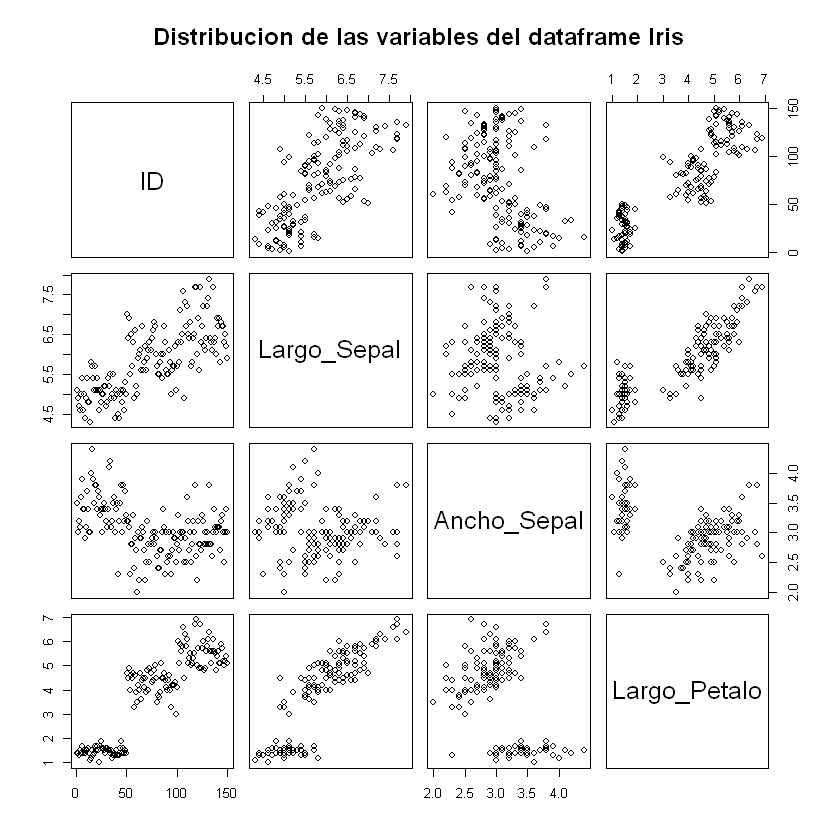

In [513]:
# Visualizando  las variables
pairs(data[,1:4], main='Distribucion de las variables del dataframe Iris')

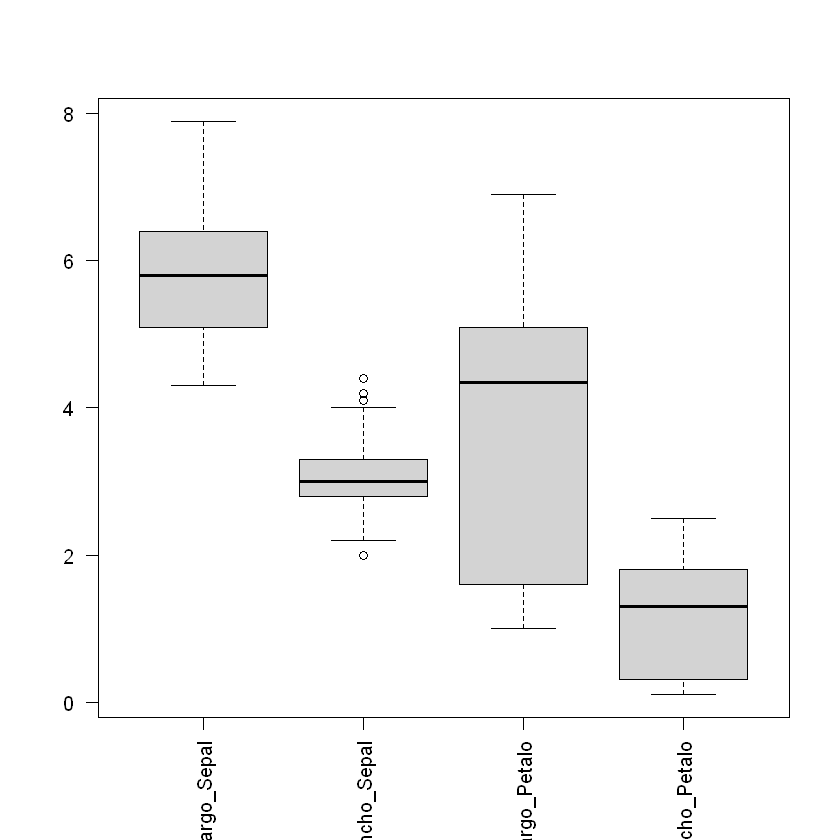

In [514]:
# Visualizando las especies en boxplot
boxplot(data[2:5],las=2)

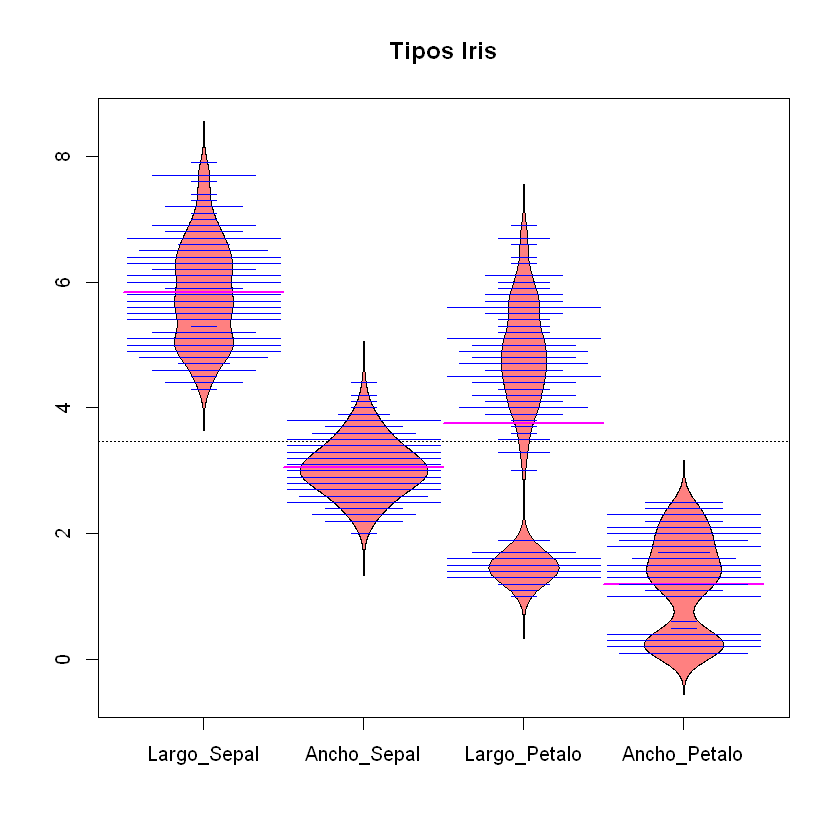

In [515]:
# Visualizando grafico de distribucion y densidad de iris
# install.packages('beanplot')
library(beanplot)
beanplot(data[2:5], main ="Tipos Iris", col=c('#ff8080','#0000FF','#0000FF','#FF00FF'), border='#000000')

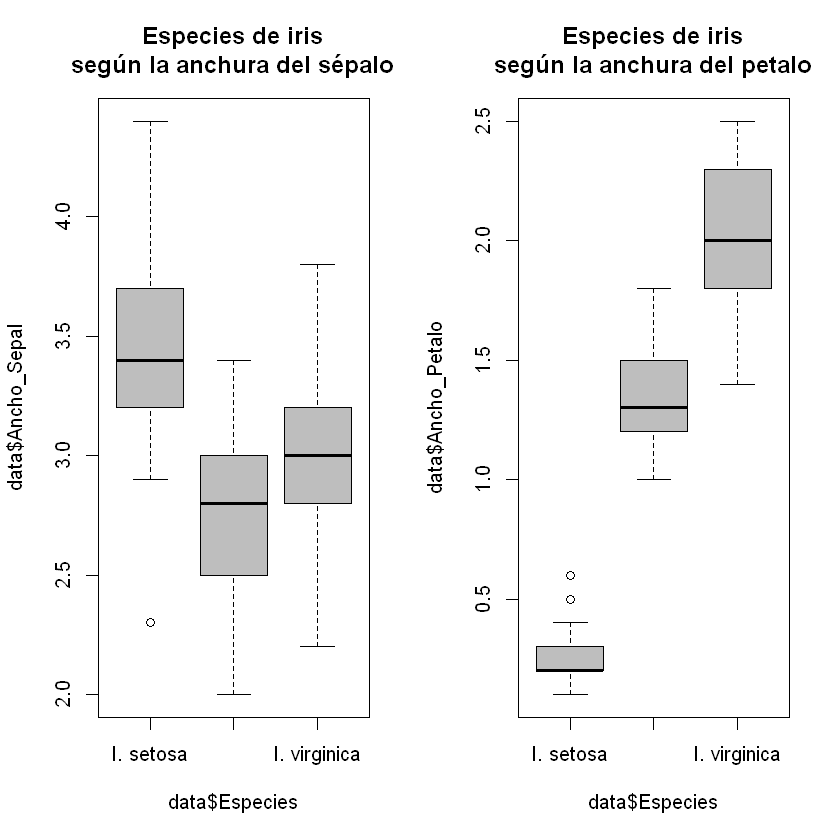

In [516]:
# Visualizando diferencias entre especies y anchos de sepalo y petalos
par(mfrow=c(1,2))
boxplot(data$Ancho_Sepal ~ data$Especies, col = "gray", main = "Especies de iris\nsegún la anchura del sépalo")
boxplot(data$Ancho_Petalo ~ data$Especies, col = "gray", main = "Especies de iris\nsegún la anchura del petalo")

In [517]:
# Verificando correlacion de variables
corr <- cor(data[,2:5])
corr = round(corr,3)
head(corr)

,Largo_Sepal,Ancho_Sepal,Largo_Petalo,Ancho_Petalo
Largo_Sepal,1.000,-0.118,0.872,0.818
Ancho_Sepal,-0.118,1.000,-0.428,-0.366
Largo_Petalo,0.872,-0.428,1.000,0.963
Ancho_Petalo,0.818,-0.366,0.963,1.000


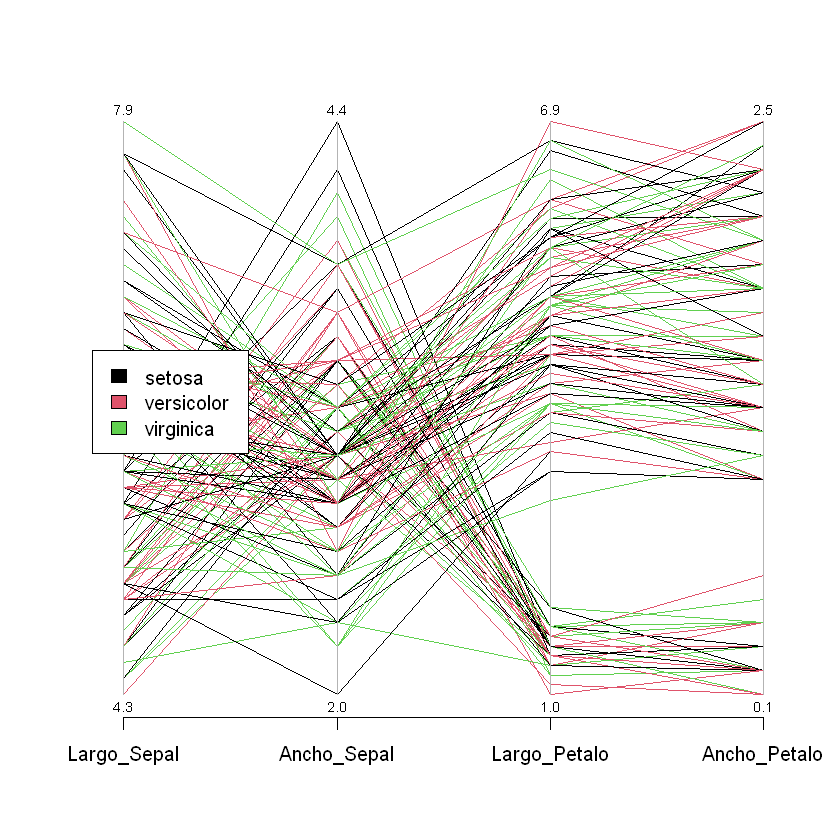

In [518]:
# Comparando variables con graficos de lineas paralelas
# install.packages('')
library(MASS)
par(xpd=TRUE)
parcoord(data[,2:5], col=c(1,2,3),var.label=TRUE, oma=c(4,4,6,12))
legend(0.85,0.6, as.vector(unique(iris$Species)), fill=c(1,2,3))

In [519]:
#=======================================
# Preparando datos para el modelo

In [520]:
# Procesando nombre de especie como variable categorica
data$Especies <- factor(data$Especies)
str(data$Especies)

 Factor w/ 3 levels "I. setosa","I. versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [521]:
# ***********************************
# Modelo: Desicion tree
# instalar packages:
# install.packages('e1071')
# install.packages('rpart.plot')
library('e1071')
library(rpart)
library(rpart.plot)
library(caTools)

In [522]:
# obteniendo el conjunto de entrenamiento y de test
set.seed(12021)
split_dt <- sample.split(data$Especies, SplitRatio = 0.80)
X_train_dt <- subset(data, split_dt == TRUE)
X_test_dt <- subset(data, split_dt == FALSE)

In [523]:
# Preparando el modelo
modelo_dt <- rpart(formula = Especies ~ ., data = X_train_dt)

In [524]:
# Realizando prediccion con el conjunto de test, obteniendo matriz de confusion y mostrando resultados
y_predict_dt <- predict(modelo_dt, newdata = X_test_dt, type = "class")
m_confusion_dt <- table(X_test_dt[, 5], y_predict_dt)
summary(m_confusion_dt)

Number of cases in table: 30 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 54, df = 34, p-value = 0.01601
	Chi-squared approximation may be incorrect

In [525]:
# Visualizando las probabilidades
table(y_predict_dt, X_test_dt[, 5])

               
y_predict_dt    0.1 0.2 0.3 0.4 1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2 2.1 2.2 2.3
  I. setosa       1   4   2   3 0   0   0   0   0   0   0   0   0 0   0   0   0
  I. versicolor   0   0   0   0 1   2   2   1   2   1   0   1   0 0   0   0   0
  I. virginica    0   0   0   0 0   0   0   0   0   1   1   1   1 1   2   1   1
               
y_predict_dt    2.5
  I. setosa       0
  I. versicolor   0
  I. virginica    1

In [526]:
# Verificando la presicion del modelo
presicion_dt <- sum(diag(m_confusion_dt))/sum(m_confusion_dt)
presicion_dt

[1] 0.03333333

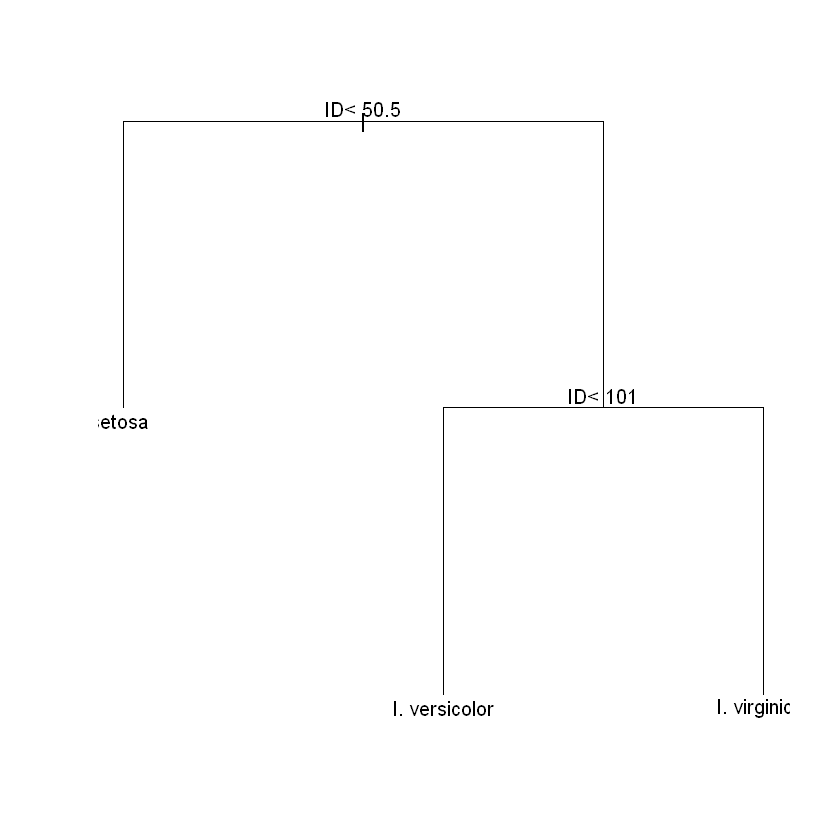

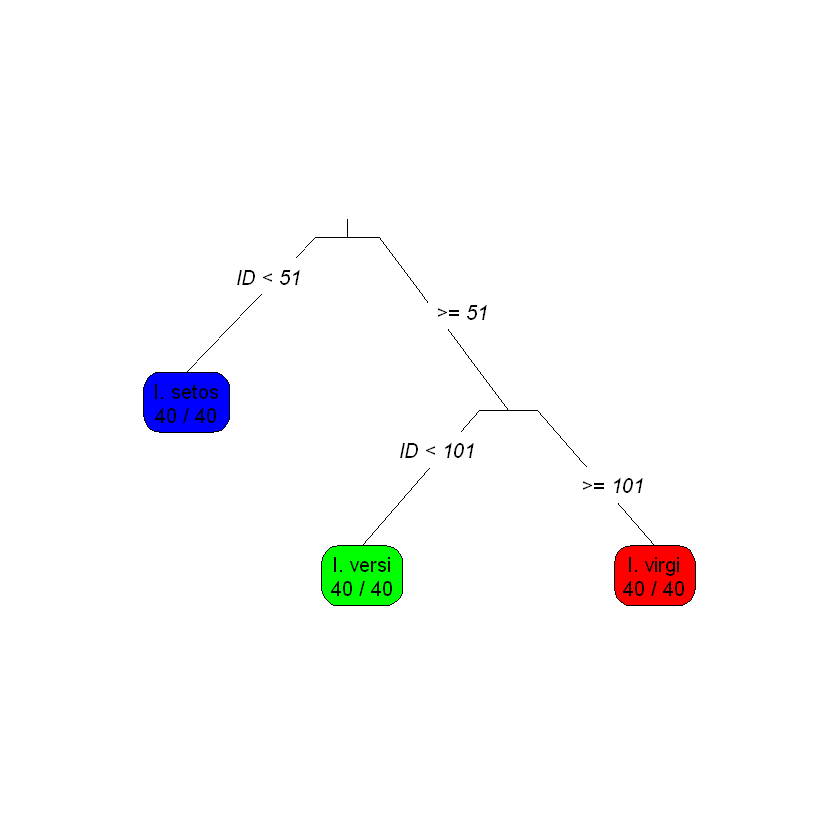

In [527]:
# Graficando el modelo
plot(modelo_dt)
text(modelo_dt)
prp(modelo_dt, type = 3, extra = 2, split.font = 3, box.col = c("blue","green", 'red')[modelo_dt$frame$yval])

In [528]:
summary(modelo_dt)

Call:
rpart(formula = Especies ~ ., data = X_train_dt)
  n= 120 

    CP nsplit rel error xerror       xstd
1 0.50      0         1 1.1875 0.05560978
2 0.01      2         0 0.0125 0.01244781

Variable importance
          ID Ancho_Petalo Largo_Petalo  Largo_Sepal  Ancho_Sepal 
          26           25           24           16           10 

Node number 1: 120 observations,    complexity param=0.5
  predicted class=I. setosa      expected loss=0.6666667  P(node) =1
    class counts:    40    40    40
   probabilities: 0.333 0.333 0.333 
  left son=2 (40 obs) right son=3 (80 obs)
  Primary splits:
      ID           < 50.5 to the left,  improve=40.00000, (0 missing)
      Largo_Petalo < 2.45 to the left,  improve=40.00000, (0 missing)
      Ancho_Petalo < 0.8  to the left,  improve=40.00000, (0 missing)
      Largo_Sepal  < 5.45 to the left,  improve=28.18154, (0 missing)
      Ancho_Sepal  < 3.15 to the right, improve=15.23923, (0 missing)
  Surrogate splits:
      Largo_Petalo < 2.4

In [529]:
# Probando el modelo, se obtiene un registro al azar y se comprueba la prediccion
set.seed(8475)
prueba_dt <- data[sample(nrow(data), 1), ]
prueba_dt

,ID,Largo_Sepal,Ancho_Sepal,Largo_Petalo,Ancho_Petalo,Especies
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
131,131,7.4,2.8,6.1,1.9,I. virginica


In [530]:
set.seed(12021)
y_predict_dt <- predict(modelo_dt, newdata = prueba_dt, type = "class")
y_predict_dt

131 
I. virginica 
Levels: I. setosa I. versicolor I. virginica

In [531]:
# Visualizando las probabilidades despues de predecir con el registro al azar
table(y_predict_dt, prueba_dt[, 5])

               
y_predict_dt    1.9
  I. setosa       0
  I. versicolor   0
  I. virginica    1

In [532]:
# Verificando la presicion del modelo luego de la prediccion al azar
m_confusion_dt <- table(prueba_dt[, 5], y_predict_dt)
presicion_dt <- sum(diag(m_confusion_dt))/sum(m_confusion_dt)
presicion_dt

[1] 0

In [533]:
# ***********************************
# Modelo: Tree clasifier
# install.packages('tree')
library(tree)

In [534]:
# obteniendo el conjunto de entrenamiento y de test
set.seed(12321)
split_tc <- sample.split(data$Especies, SplitRatio = 0.80)
X_train_tc <- subset(data, split_tc == TRUE)
X_test_tc <- subset(data, split_tc == FALSE)

In [535]:
# Preparando el modelo y visualizando resultados
modelo_tc <- tree(Especies ~ ., data=X_train_tc)

In [536]:
# Realizando prediccion con datos de prueba, obteniendo matriz de confusion y mostrando resultados
y_predict_tc <- predict(modelo_tc, newdata=X_test_tc, type="class")
m_confusion_tc <- table(X_test_tc[, 5], y_predict_tc)
summary(m_confusion_tc)

Number of cases in table: 30 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 51.75, df = 26, p-value = 0.001932
	Chi-squared approximation may be incorrect

In [537]:
# Visualizando las probabilidades
table(y_predict_tc, X_test_tc[, 5])

               
y_predict_tc    0.1 0.2 1 1.1 1.2 1.3 1.4 1.5 1.6 1.8 1.9 2 2.3 2.5
  I. setosa       1   8 0   0   0   0   0   0   0   0   0 0   0   0
  I. versicolor   0   1 1   1   1   1   2   3   1   0   0 0   0   0
  I. virginica    0   0 0   0   0   0   0   0   1   1   1 1   3   3

In [538]:
# Verificando la presicion del modelo
presicion_tc <- sum(diag(m_confusion_tc))/sum(m_confusion_tc)
presicion_tc

[1] 0.06666667

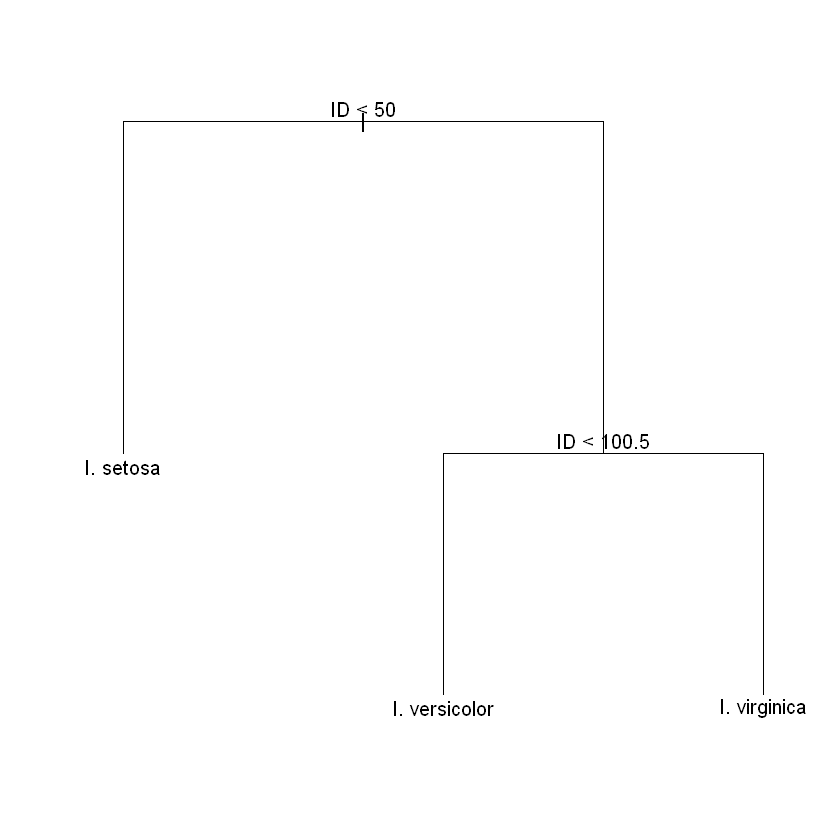

In [539]:
# Graficando el modelo
plot(modelo_tc)
text(modelo_tc)

In [540]:
summary(modelo_tc)


Classification tree:
tree(formula = Especies ~ ., data = X_train_tc)
Variables actually used in tree construction:
[1] "ID"
Number of terminal nodes:  3 
Residual mean deviance:  0 = 0 / 117 
Misclassification error rate: 0 = 0 / 120 

In [541]:
# Probando el modelo, se obtiene un registro al azar y se comprueba la prediccion
set.seed(8475)
prueba_tc <- data[sample(nrow(data), 1), ]
prueba_tc

,ID,Largo_Sepal,Ancho_Sepal,Largo_Petalo,Ancho_Petalo,Especies
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
131,131,7.4,2.8,6.1,1.9,I. virginica


In [542]:
set.seed(12321)
y_predict_tc <- predict(modelo_tc, newdata = prueba_tc, type = "class")
y_predict_tc

[1] I. virginica
Levels: I. setosa I. versicolor I. virginica

In [543]:
# Visualizando las probabilidades despues del registro aleatorio
table(y_predict_tc, prueba_tc[, 5])

               
y_predict_tc    1.9
  I. setosa       0
  I. versicolor   0
  I. virginica    1

In [544]:
# Verificando la presicion del modelo posterior a las pruebas del registro aleatorio
m_confusion_tc <- table(prueba_tc[, 5], y_predict_tc)
presicion_tc <- sum(diag(m_confusion_tc))/sum(m_confusion_tc)
presicion_tc

[1] 0

In [545]:
# ***********************************
# Modelo: SVM
# install.packages('caTools')
library(caTools)

In [546]:
# Preparando el conjunto de datos de entrenamiento y de test
set.seed(32123)
split_svm <- sample.split(data$Especies, SplitRatio = 0.80)
X_train_svm <- subset(data, split_svm == TRUE)
X_test_svm <- subset(data, split_svm == FALSE)

In [547]:
# Escalando variables, Preparando el modelo y visualizando resultados
X_train_svm[-6] <- scale(X_train_svm[-6])
X_test_svm[-6] <- scale(X_test_svm[-6])
modelo_svm <- svm(Especies ~ ., data=X_train_svm)

In [548]:
# Realizando prediccion con datos de prueba, obteniendo matriz de confusion y mostrando resultados
y_predict_svm <- predict(modelo_svm, newdata = X_test_svm[-6])
m_confusion_svm <- table(X_test_svm[, 6], y_predict_svm)
summary(m_confusion_svm)

Number of cases in table: 30 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 60, df = 4, p-value = 2.901e-12
	Chi-squared approximation may be incorrect

In [549]:
# Visualizando las probabilidades
table(y_predict_svm, X_test_svm[, 6])

               
y_predict_svm   I. setosa I. versicolor I. virginica
  I. setosa            10             0            0
  I. versicolor         0            10            0
  I. virginica          0             0           10

In [550]:
# Verificando la presicion del modelo
presicion_svm <- sum(diag(m_confusion_svm))/sum(m_confusion_svm)
presicion_tc

[1] 0

In [551]:
# Mostrando resultados del modelo
summary(modelo_svm)


Call:
svm(formula = Especies ~ ., data = X_train_svm)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  43

 ( 12 17 14 )


Number of Classes:  3 

Levels: 
 I. setosa I. versicolor I. virginica




In [552]:
# Probando el modelo, se obtiene un registro al azar y se comprueba la prediccion
set.seed(8475)
prueba_svm <- data[sample(nrow(data), 1), ]
prueba_svm

,ID,Largo_Sepal,Ancho_Sepal,Largo_Petalo,Ancho_Petalo,Especies
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
131,131,7.4,2.8,6.1,1.9,I. virginica


In [553]:
set.seed(32123)
y_predict_svm <- predict(modelo_svm, newdata = prueba_svm, type = "class")
y_predict_svm

131 
I. virginica 
Levels: I. setosa I. versicolor I. virginica

In [554]:
# Visualizando las probabilidades despues de predecir con el registro aleatorio
table(y_predict_svm, prueba_svm[, 5])

               
y_predict_svm   1.9
  I. setosa       0
  I. versicolor   0
  I. virginica    1

In [555]:
# Verificando la presicion del modelo posterior a las pruebas con el registro al azar
m_confusion_svm <- table(prueba_svm[, 6], y_predict_svm)
presicion_svm <- sum(diag(m_confusion_svm))/sum(m_confusion_svm)
presicion_svm

[1] 1

In [556]:
# ***********************************
# Modelo:
# install.packages('ggplot2')
# install.packages('dplyr')
# install.packages('cluster')
# install.packages('tidyr')
library(tidyr)
library(ggplot2)
# library(dplyr)
library(cluster)
library(RColorBrewer)
theme_set(theme_bw(base_size=12)) 

In [557]:
# Data a trabajar con kMeans
str(data)

'data.frame':	150 obs. of  6 variables:
 $ ID          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Largo_Sepal : num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Ancho_Sepal : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Largo_Petalo: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Ancho_Petalo: num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Especies    : Factor w/ 3 levels "I. setosa","I. versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [558]:
head(data, 10)

,ID,Largo_Sepal,Ancho_Sepal,Largo_Petalo,Ancho_Petalo,Especies
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,5.1,3.5,1.4,0.2,I. setosa
2,2,4.9,3.0,1.4,0.2,I. setosa
3,3,4.7,3.2,1.3,0.2,I. setosa
4,4,4.6,3.1,1.5,0.2,I. setosa
5,5,5.0,3.6,1.4,0.2,I. setosa
6,6,5.4,3.9,1.7,0.4,I. setosa
7,7,4.6,3.4,1.4,0.3,I. setosa
8,8,5.0,3.4,1.5,0.2,I. setosa
9,9,4.4,2.9,1.4,0.2,I. setosa


In [559]:
tail(data, 10)

,ID,Largo_Sepal,Ancho_Sepal,Largo_Petalo,Ancho_Petalo,Especies
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
141,141,6.7,3.1,5.6,2.4,I. virginica
142,142,6.9,3.1,5.1,2.3,I. virginica
143,143,5.8,2.7,5.1,1.9,I. virginica
144,144,6.8,3.2,5.9,2.3,I. virginica
145,145,6.7,3.3,5.7,2.5,I. virginica
146,146,6.7,3.0,5.2,2.3,I. virginica
147,147,6.3,2.5,5.0,1.9,I. virginica
148,148,6.5,3.0,5.2,2.0,I. virginica
149,149,6.2,3.4,5.4,2.3,I. virginica


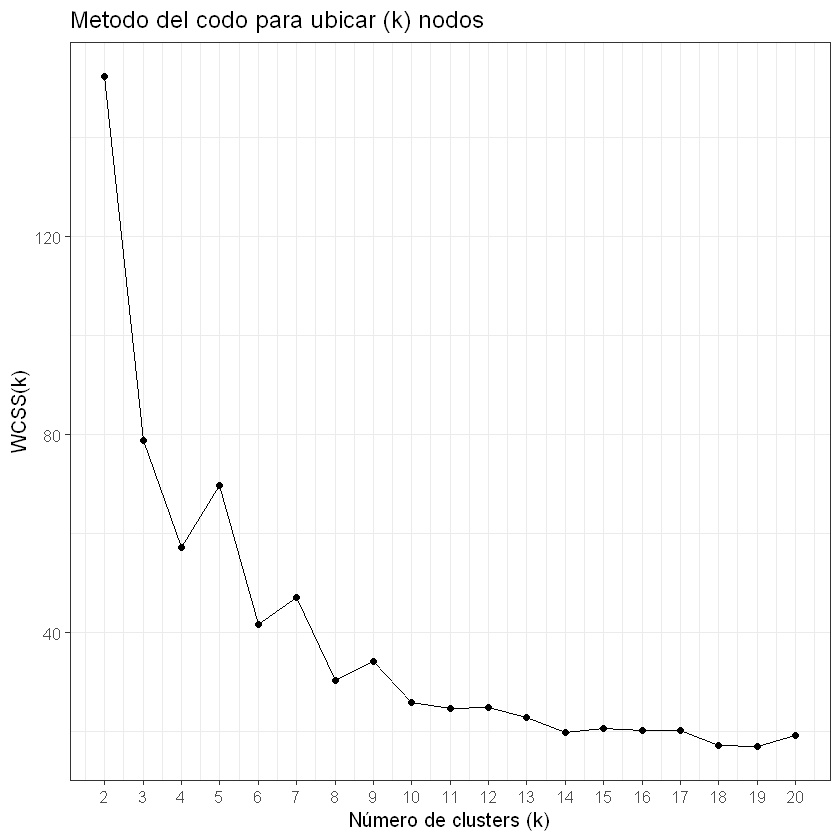

In [560]:
# Aplicando el metodo del codo para buscar el numero optimo de nodos y muestro el resultado
X = data[, 2:5]
kmean_withinss <- function(k) {
    cluster <- kmeans(X, k)
    return (cluster$tot.withinss)
}
max_k <- 20
wss <- sapply(2:max_k, kmean_withinss)
elbow <-data.frame(2:max_k, wss)
ggplot(elbow, aes(x = X2.max_k, y = wss)) + geom_point() + geom_line() +
  ggtitle ('Metodo del codo para ubicar (k) nodos') +
  labs(x = 'Número de clusters (k)',y = 'WCSS(k)') +
  scale_x_continuous(breaks = seq(1, 20, by = 1))

In [561]:
# Aplicando el metodo kMeans con k optimo
num_k = 7
modelo_km <- kmeans(X, num_k, iter.max = 300, nstart = 10)

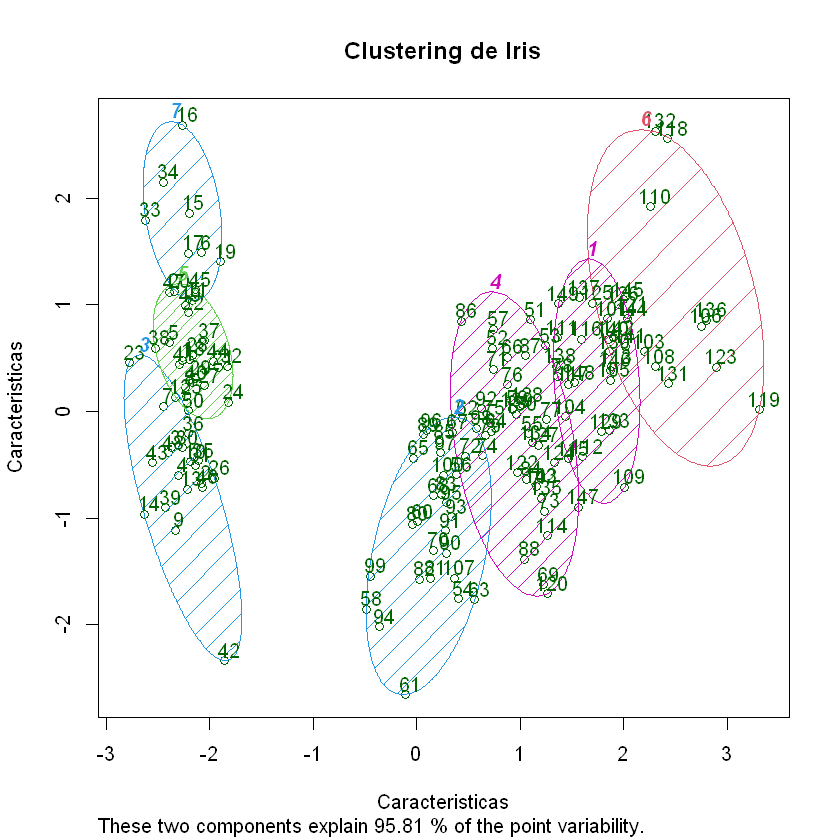

In [562]:
# Visualizando los cluster generados
clusplot(X, modelo_km$cluster, lines = 0, shade = TRUE,
    color = TRUE, labels = 2, plotchar = FALSE,
    span = TRUE,main = "Clustering de Iris",
    xlab = 'Caracteristicas', ylab = 'Caracteristicas')

In [563]:
# Mostrando los centroides
modelo_km$centers

,Largo_Sepal,Ancho_Sepal,Largo_Petalo,Ancho_Petalo
1,6.529167,3.058333,5.508333,2.162500
2,5.529630,2.622222,3.940741,1.218519
3,4.678947,3.084211,1.378947,0.200000
4,6.229730,2.851351,4.767568,1.572973
5,5.100000,3.513043,1.526087,0.273913
6,7.475000,3.125000,6.300000,2.050000
7,5.512500,4.000000,1.475000,0.275000


In [564]:
# Mostrando el tamaño de los clusters
modelo_km$size

[1] 24 27 19 37 23 12  8

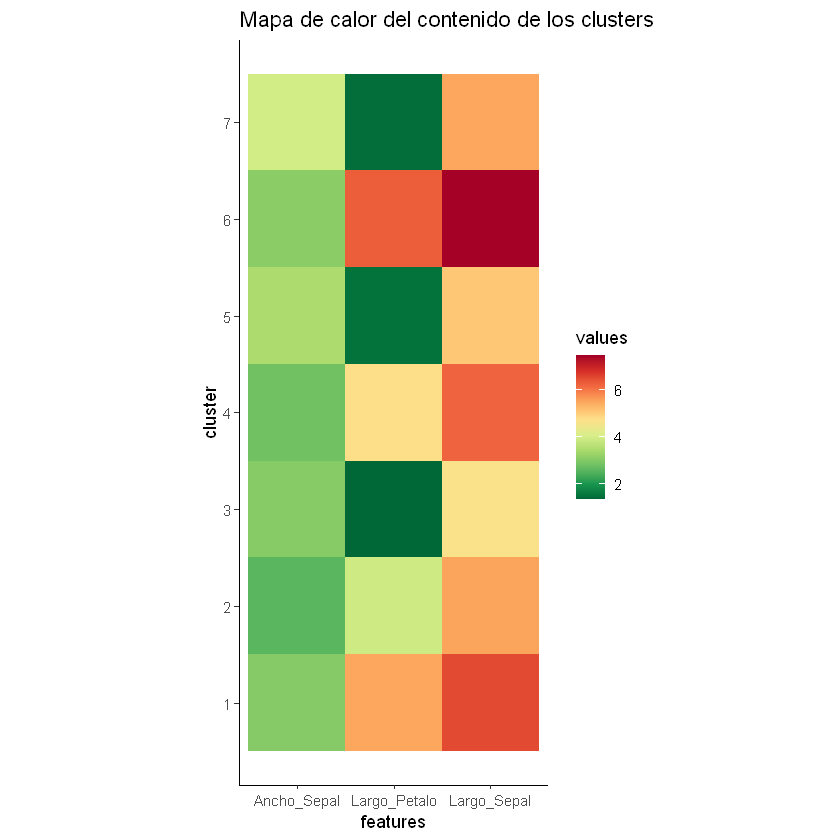

In [565]:
cluster <- c(1: num_k)
centroides <- data.frame(cluster, modelo_km$centers)
centroides <- gather(centroides, features, values, 2:4)
paleta_colores <-colorRampPalette(rev(brewer.pal(10, 'RdYlGn')),space='Lab')
ggplot(data = centroides, aes(x = features, y = cluster, fill = values)) +
  ggtitle ('Mapa de calor del contenido de los clusters') +
  scale_y_continuous(breaks = seq(1, 7, by = 1)) +
  geom_tile() +coord_equal() +
  scale_fill_gradientn(colours = paleta_colores(90)) +
  theme_classic()

In [566]:
# Visualizando el modelo
str(centroides)

'data.frame':	21 obs. of  4 variables:
 $ cluster     : int  1 2 3 4 5 6 7 1 2 3 ...
 $ Ancho_Petalo: num  2.162 1.219 0.2 1.573 0.274 ...
 $ features    : chr  "Largo_Sepal" "Largo_Sepal" "Largo_Sepal" "Largo_Sepal" ...
 $ values      : num  6.53 5.53 4.68 6.23 5.1 ...


In [567]:
# Visualizando el cluster
str(modelo_km)

List of 9
 $ cluster     : int [1:150] 5 3 3 3 5 7 3 5 3 3 ...
 $ centers     : num [1:7, 1:4] 6.53 5.53 4.68 6.23 5.1 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:7] "1" "2" "3" "4" ...
  .. ..$ : chr [1:4] "Largo_Sepal" "Ancho_Sepal" "Largo_Petalo" "Ancho_Petalo"
 $ totss       : num 681
 $ withinss    : num [1:7] 5.46 9.23 2.49 11.96 2.09 ...
 $ tot.withinss: num 36.9
 $ betweenss   : num 645
 $ size        : int [1:7] 24 27 19 37 23 12 8
 $ iter        : int 3
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [568]:
# Verificando el cluster
table(data$Especies, modelo_km$cluster)

               
                 1  2  3  4  5  6  7
  I. setosa      0  0 19  0 23  0  8
  I. versicolor  0 26  0 24  0  0  0
  I. virginica  24  1  0 13  0 12  0